In [1]:
import cv2
import matplotlib.pyplot as plt

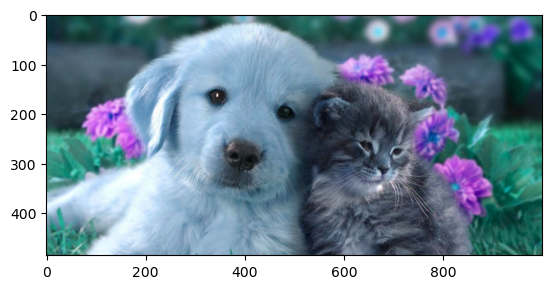

In [2]:
image = cv2.imread('cat and dog.jpg', 1)
original_image = image.copy()
plt.imshow(image)

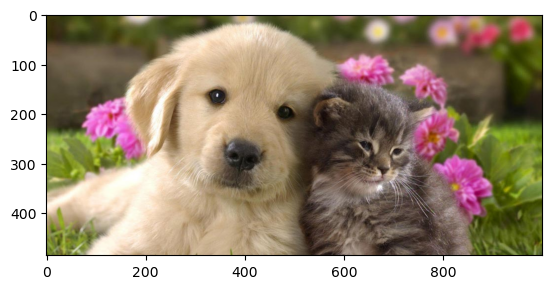

In [3]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [5]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [7]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
classes[57]

'sofa'

In [9]:
file = open('coco.names')
x = file.read()
print(x.split('\n'))
file.close()

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


In [10]:
layer_names = net.getLayerNames()
# output_layer = [layer_names[i[0]] for i in net.getUnconnectedOutLayers()]
# output_layer

In [11]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [12]:
output_layer = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [13]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [14]:
height, width,depth = rgb_image.shape
height, width,depth

(485, 1000, 3)

In [15]:
blob = cv2.dnn.blobFromImage(rgb_image, 0.003, (224, 224), (0, 0, 0), True)


In [16]:
blob

array([[[[0.045, 0.045, 0.048, ..., 0.114, 0.123, 0.138],
         [0.042, 0.042, 0.042, ..., 0.117, 0.126, 0.138],
         [0.039, 0.042, 0.045, ..., 0.129, 0.129, 0.135],
         ...,
         [0.057, 0.156, 0.156, ..., 0.162, 0.171, 0.138],
         [0.081, 0.168, 0.159, ..., 0.156, 0.189, 0.123],
         [0.084, 0.153, 0.171, ..., 0.141, 0.183, 0.111]],

        [[0.192, 0.186, 0.183, ..., 0.333, 0.327, 0.33 ],
         [0.186, 0.183, 0.177, ..., 0.336, 0.33 , 0.327],
         [0.18 , 0.177, 0.171, ..., 0.342, 0.333, 0.327],
         ...,
         [0.354, 0.414, 0.414, ..., 0.375, 0.345, 0.297],
         [0.345, 0.423, 0.375, ..., 0.366, 0.339, 0.27 ],
         [0.33 , 0.396, 0.375, ..., 0.351, 0.333, 0.258]],

        [[0.201, 0.198, 0.195, ..., 0.303, 0.306, 0.312],
         [0.198, 0.195, 0.189, ..., 0.306, 0.306, 0.309],
         [0.192, 0.189, 0.186, ..., 0.315, 0.312, 0.309],
         ...,
         [0.294, 0.36 , 0.36 , ..., 0.327, 0.297, 0.255],
         [0.282, 0.366, 0.

In [17]:
net.setInput(blob)
outs = net.forward(output_layer)

In [18]:
print(len(outs))
print(outs)

3
(array([[0.08660461, 0.0859658 , 0.7029915 , ..., 0.        , 0.        ,
        0.        ],
       [0.08782966, 0.05798461, 0.52135605, ..., 0.        , 0.        ,
        0.        ],
       [0.08717456, 0.06728188, 1.6198894 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9230748 , 0.9074932 , 0.7676028 , ..., 0.        , 0.        ,
        0.        ],
       [0.9241409 , 0.9303494 , 0.5622127 , ..., 0.        , 0.        ,
        0.        ],
       [0.9394347 , 0.9372278 , 1.4383724 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.03929529, 0.04444901, 0.10138661, ..., 0.        , 0.        ,
        0.        ],
       [0.04021235, 0.0396462 , 0.5985607 , ..., 0.        , 0.        ,
        0.        ],
       [0.04510542, 0.03213229, 0.15210819, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9483078 , 0.9506343 , 0.10238762, ..., 0.        , 0.        ,
        0.        ],
       [0.963509

In [19]:
len(outs[2])

2352

In [20]:
len(outs[2])

2352

In [21]:
outs[2][2001]

array([8.4555101e-01, 8.3485806e-01, 2.5779562e-02, 5.1473595e-02,
       2.3934228e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

[16]
[0.7227528095245361]
[[-19, 10, 576, 485]]
[0.26967457 0.52247125 0.57663167 1.000822   0.9327608  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.7227528  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[16, 16]
[0.7227528095245361, 0.7337653040885925]
[[-19, 10, 576, 485], [25, 14, 570, 472]]
[0.31034258 0.5158972

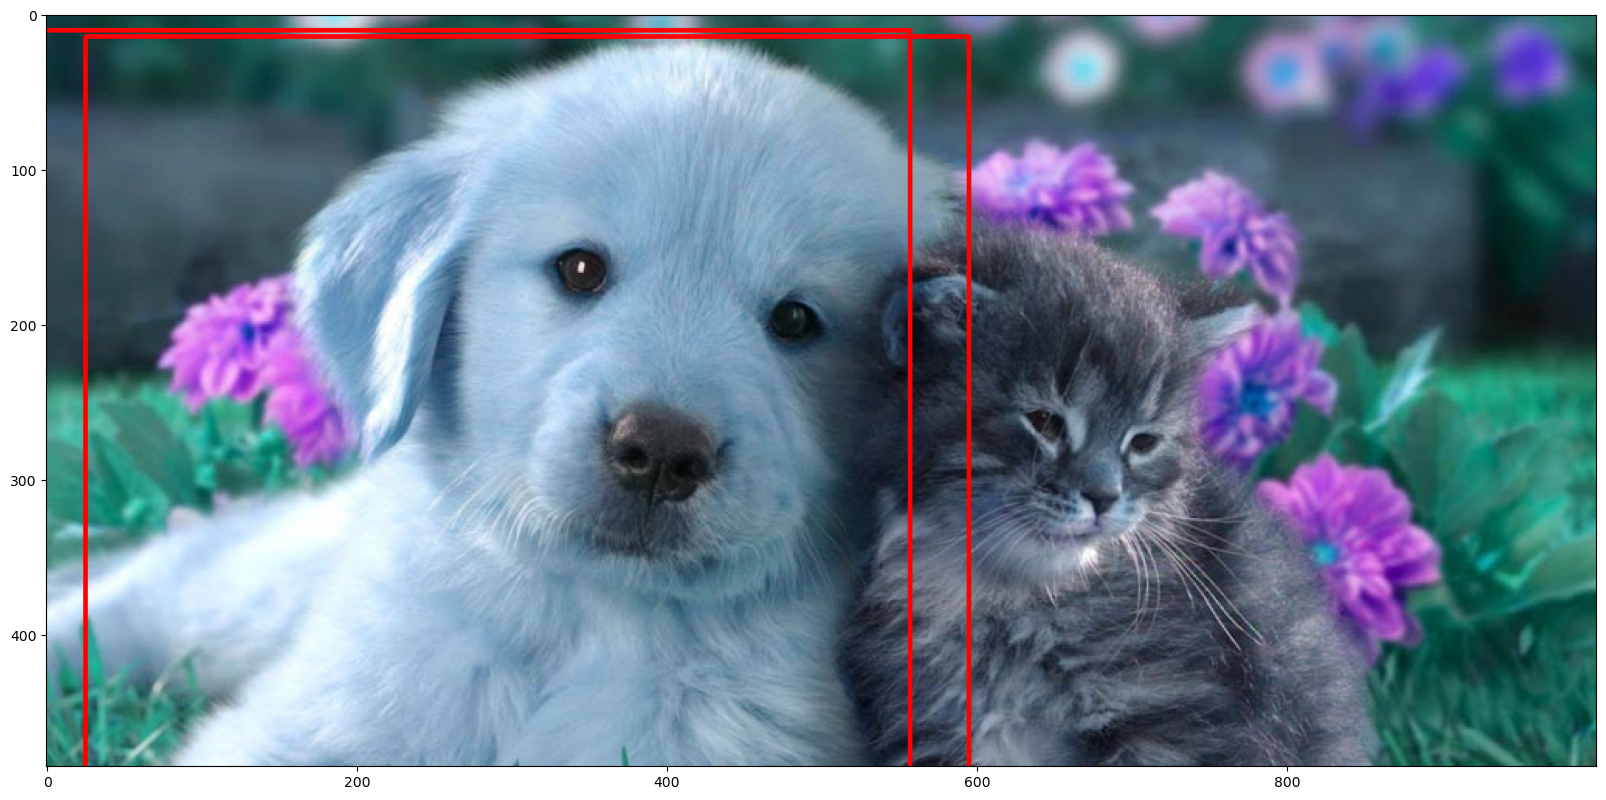

In [22]:
# blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)
# net.setInput(blob)
# outs = net.forward(output_layer)

import numpy as np
class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        # print(class_id)
        confidence = scores[class_id]
        # if confidence > 0:
        #     print(class_id )
        #     print(det)

        if confidence > 0.6:
            # print(det)
            cx = int(det[0] * width)
            cy = int(det[1] * height)

            w = int(det[2] * width)
            h = int(det[3] * height)

            x, y = int(cx - w / 2), int(cy - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            print(det)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image)

2
[1]
25 14 570 472
dog


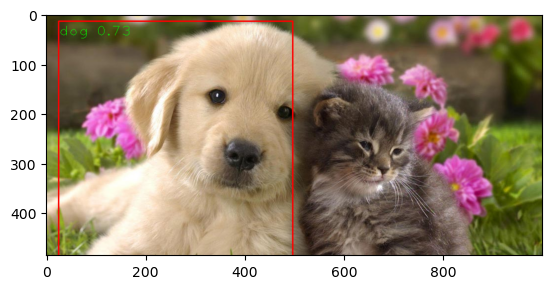

In [23]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        conf = confidences[i]
        print(label)
        cv2.rectangle(rgb_image, (x, y), (x+h, y+w), (255, 0, 0), 2)
        cv2.putText(rgb_image, f"{label} {round(conf,2)}", (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 1)

plt.imshow(rgb_image)